# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(weather_api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

2b36184641483dc7edf847dd4aa11f2f


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
import json
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#Beginning Data Retrieval  
# set up lists to hold reponse info
print(weather_api_key)

Weather=[]
i=0
#response = requests.get(query_url + "charlotte").json()
#print(json.dumps(response, indent=4, sort_keys=True))
for  city  in cities:
    try:
        response = requests.get(query_url + city).json()
        i=i+1
        print(f"Processing record  {i} of Set 1 |{city}")
        Lat=(response['coord']['lat'])
        Max_Temp=(response['main']['temp_max'])
        Cloudiness=(response['clouds']['all'])
        Country=(response['sys']['country'])
        Date=(response['dt'])
        Humidity=(response['main']['humidity'])
        Lng=(response['coord']['lon'])
        Wind_Speed=(response['wind']['speed'])
        Weather.append({    "City" : city,
                "Cloudiness" : Cloudiness,
                "Country" : Country,
                "Date" : Date,
                "Humidity" :  Humidity,
                "Lat" : Lat,
                "Lng" : Lng,
                "Max_Temp": Max_Temp,
                "Wind_Speed": Wind_Speed
               })
        time.sleep(.01)
    except:
        pass    

2b36184641483dc7edf847dd4aa11f2f
Processing record  1 of Set 1 |tazovskiy
Processing record  2 of Set 1 |puerto ayora
Processing record  3 of Set 1 |brae
Processing record  4 of Set 1 |hirara
Processing record  5 of Set 1 |tsihombe
Processing record  6 of Set 1 |rikitea
Processing record  7 of Set 1 |kodiak
Processing record  8 of Set 1 |hithadhoo
Processing record  9 of Set 1 |punta arenas
Processing record  10 of Set 1 |pochutla
Processing record  11 of Set 1 |kang
Processing record  12 of Set 1 |te anau
Processing record  13 of Set 1 |busselton
Processing record  14 of Set 1 |cherskiy
Processing record  15 of Set 1 |hualmay
Processing record  16 of Set 1 |vaini
Processing record  17 of Set 1 |port-cartier
Processing record  18 of Set 1 |chuy
Processing record  19 of Set 1 |yellowknife
Processing record  20 of Set 1 |ushuaia
Processing record  21 of Set 1 |saskylakh
Processing record  22 of Set 1 |kaitangata
Processing record  23 of Set 1 |hermanus
Processing record  24 of Set 1 |tor

Processing record  196 of Set 1 |planadas
Processing record  197 of Set 1 |atambua
Processing record  198 of Set 1 |rostovka
Processing record  199 of Set 1 |puri
Processing record  200 of Set 1 |warwick
Processing record  201 of Set 1 |oriximina
Processing record  202 of Set 1 |puerto madryn
Processing record  203 of Set 1 |saint anthony
Processing record  204 of Set 1 |pacific grove
Processing record  205 of Set 1 |langsa
Processing record  206 of Set 1 |san andres
Processing record  207 of Set 1 |vostok
Processing record  208 of Set 1 |ksenyevka
Processing record  209 of Set 1 |samarai
Processing record  210 of Set 1 |arlit
Processing record  211 of Set 1 |colceag
Processing record  212 of Set 1 |khandyga
Processing record  213 of Set 1 |uwayl
Processing record  214 of Set 1 |vaitupu
Processing record  215 of Set 1 |lorengau
Processing record  216 of Set 1 |osmaniye
Processing record  217 of Set 1 |emerald
Processing record  218 of Set 1 |kuche
Processing record  219 of Set 1 |sarys

Processing record  391 of Set 1 |oranjemund
Processing record  392 of Set 1 |rio gallegos
Processing record  393 of Set 1 |aleksandrov gay
Processing record  394 of Set 1 |iranshahr
Processing record  395 of Set 1 |jacareacanga
Processing record  396 of Set 1 |pando
Processing record  397 of Set 1 |preobrazheniye
Processing record  398 of Set 1 |belmonte
Processing record  399 of Set 1 |port hedland
Processing record  400 of Set 1 |hamilton
Processing record  401 of Set 1 |jahrom
Processing record  402 of Set 1 |hambantota
Processing record  403 of Set 1 |margate
Processing record  404 of Set 1 |carutapera
Processing record  405 of Set 1 |arman
Processing record  406 of Set 1 |japura
Processing record  407 of Set 1 |zeya
Processing record  408 of Set 1 |villa guerrero
Processing record  409 of Set 1 |parabel
Processing record  410 of Set 1 |buraydah
Processing record  411 of Set 1 |vila do maio
Processing record  412 of Set 1 |swan river
Processing record  413 of Set 1 |canberra
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_data = pd.DataFrame(Weather)
weather_data.to_csv("weather.csv")

In [14]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,tazovskiy,100,RU,1580664988,95,67.47,78.70,-9.85,20.65
1,puerto ayora,20,EC,1580664988,70,-0.74,-90.35,84.20,14.99
2,brae,20,GB,1580664989,80,60.40,-1.35,35.60,5.82
3,hirara,0,JP,1580664989,57,24.80,125.28,63.91,7.58
4,rikitea,100,PF,1580664989,77,-23.12,-134.97,79.48,16.15
...,...,...,...,...,...,...,...,...,...
527,byron bay,40,AU,1580665242,83,-28.65,153.62,79.00,10.29
528,tombouctou,0,ML,1580665242,7,20.00,-3.00,73.74,6.67
529,usatove,94,UA,1580665242,76,46.53,30.66,51.80,6.71
530,lata,18,PT,1580665242,68,40.16,-8.33,68.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

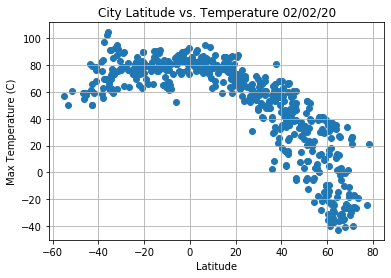

In [30]:
from datetime import date
today = date.today().strftime("%m/%d/%y")
plt.scatter(weather_data['Lat'],weather_data['Max_Temp'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.title("City Latitude vs. Temperature " + today)
plt.show()

#### Latitude vs. Humidity Plot

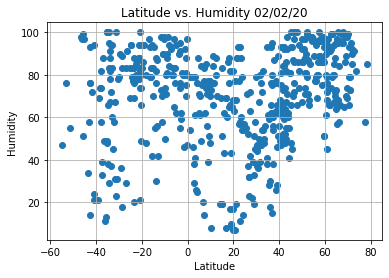

In [21]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.title("Latitude vs. Humidity " + today)
plt.show()

#### Latitude vs. Cloudiness Plot

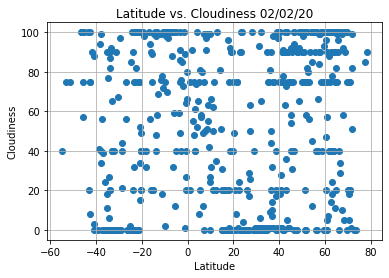

In [22]:
plt.scatter(weather_data['Lat'],weather_data['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.title("Latitude vs. Cloudiness " + today)
plt.show()

#### Latitude vs. Wind Speed Plot

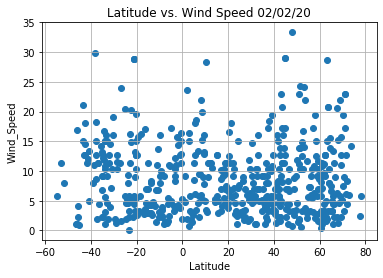

In [23]:
plt.scatter(weather_data['Lat'],weather_data['Wind_Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.grid(True)
plt.title("Latitude vs. Wind Speed " + today)
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [25]:
# Create Northern and Southern Hemisphere DataFrames

north_hemisphere=weather_data[weather_data.Lat>0]
south_hemisphere=weather_data[weather_data.Lat<0]


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,puerto ayora,20,EC,1580664988,70,-0.74,-90.35,84.20,14.99
4,rikitea,100,PF,1580664989,77,-23.12,-134.97,79.48,16.15
6,hithadhoo,27,MV,1580664989,75,-0.60,73.08,82.26,12.91
7,punta arenas,75,CL,1580664990,76,-53.15,-70.92,50.00,11.41
9,kang,0,BW,1580664990,20,-23.68,22.79,81.97,9.28
...,...,...,...,...,...,...,...,...,...
511,karratha,15,AU,1580665240,74,-20.74,116.85,81.57,13.18
515,tual,100,ID,1580665241,76,-5.67,132.75,83.79,10.96
519,tandil,56,AR,1580665241,33,-37.32,-59.13,97.00,1.99
523,vryburg,56,ZA,1580665241,29,-26.96,24.73,76.53,1.66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7188222925488038


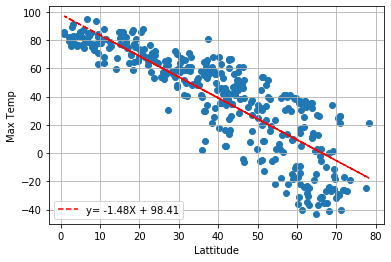

In [54]:
from scipy import stats
lat=north_hemisphere['Lat']
maxtemp=north_hemisphere['Max_Temp']
mt_slope, mt_int, mt_r, mt_p, mt_std_err = stats.linregress(lat, maxtemp)
mt_fit = mt_slope * lat + mt_int
print("r-squared:", mt_r**2)
plt.scatter(lat,maxtemp)
plt.plot(lat,mt_fit,"--", color="red", label="y= " +str(round(mt_slope,2)) +"X + "+ str(round(mt_int,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.legend(loc='lower left')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.16319326204714182


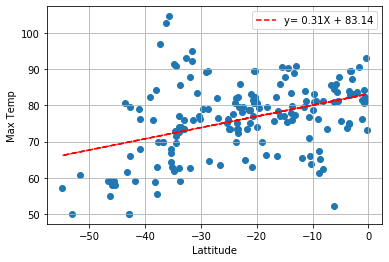

In [57]:

lat=south_hemisphere['Lat']
maxtemp=south_hemisphere['Max_Temp']
mt_slope, mt_int, mt_r, mt_p, mt_std_err = stats.linregress(lat, maxtemp)
mt_fit = mt_slope * lat + mt_int
print("r-squared:", mt_r**2)
plt.scatter(lat,maxtemp)
plt.plot(lat,mt_fit,"--", color="red", label="y= " +str(round(mt_slope,2)) +"X + "+ str(round(mt_int,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.legend(loc='upper right')
plt.show()

By the above graphs we can see releations ship Lattitude and Max Temperarue.
In Northern Hemisphere max temperatures are dropped  form equator to  north pole.
Similarly in Sothern hemispere   temperatures  are increases from south to equator, though r-square is less trend consistent

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.22037353425248288


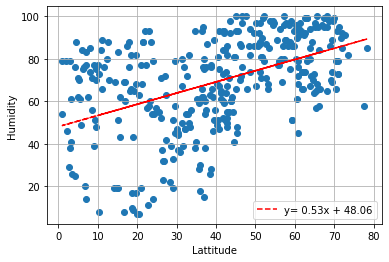

In [65]:
lat=north_hemisphere['Lat']
humidity=north_hemisphere['Humidity']
hm_slope, hm_int, hm_r, hm_p, hm_std_err = stats.linregress(lat, humidity)
hm_fit = hm_slope * lat + hm_int
print("r-squared:", hm_r**2)
plt.scatter(lat,humidity)
plt.plot(lat,hm_fit,"--", color="red",label="y= " +str(round(hm_slope,2)) +"x + "+ str(round(hm_int,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.legend(loc='lower right')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.04807140296486223


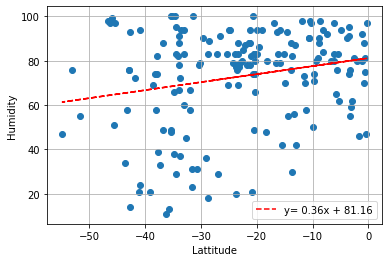

In [66]:
lat=south_hemisphere['Lat']
humidity=south_hemisphere['Humidity']
hm_slope, hm_int, hm_r, hm_p, hm_std_err = stats.linregress(lat, humidity)
hm_fit = hm_slope * lat + hm_int
print("r-squared:", hm_r**2)
plt.scatter(lat,humidity)
plt.plot(lat,hm_fit,"--", color="red",label="y= " +str(round(hm_slope,2)) +"x + "+ str(round(hm_int,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.legend(loc='lower right')
plt.show()

By the above graphs we can see very weak releation ship   between Lattitude and Humidity.
In Northern Hemisphere humidity increased from eaquator to north.
Similarly in Sothern hemispere   humidity  are increases from south to equator, but it is a eak releation ship

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.05086409820464714


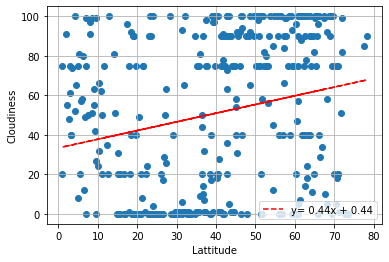

In [68]:
lat=north_hemisphere['Lat']
cloudiness=north_hemisphere['Cloudiness']
cl_slope, cl_int, cl_r, cl_p,cl_std_err = stats.linregress(lat, cloudiness)
cl_fit = cl_slope * lat + cl_int
print("r-squared:", cl_r**2)
plt.scatter(lat,cloudiness)
plt.plot(lat,cl_fit,"--", color="red",label="y= " +str(round(cl_slope,2)) +"x + "+ str(round(cl_slope,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.legend(loc='lower right')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.045313601581781014


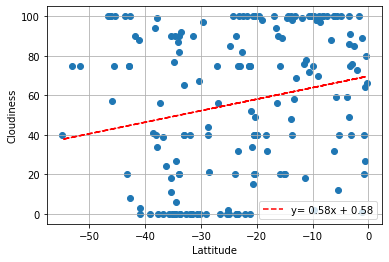

In [69]:
lat=south_hemisphere['Lat']
cloudiness=south_hemisphere['Cloudiness']
cl_slope, cl_int, cl_r, cl_p,cl_std_err = stats.linregress(lat, cloudiness)
cl_fit = cl_slope * lat + cl_int
print("r-squared:", cl_r**2)
plt.scatter(lat,cloudiness)
plt.plot(lat,cl_fit,"--", color="red",label="y= " +str(round(cl_slope,2)) +"x + "+ str(round(cl_slope,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.legend(loc='lower right')
plt.show()

By the above graphs we can say  no  releation ship   between Lattitude and cloudiness.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.0015861295931020897


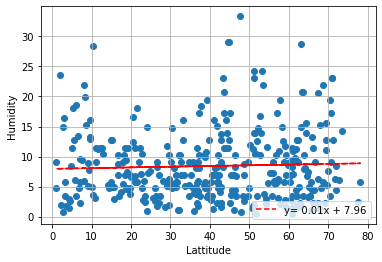

In [72]:
lat=north_hemisphere['Lat']
windspeed=north_hemisphere['Wind_Speed']
ws_slope, ws_int, ws_r, ws_p, ws_std_err = stats.linregress(lat, windspeed)
ws_fit = ws_slope * lat + ws_int
print("r-squared:", ws_r**2)
plt.scatter(lat,windspeed)
plt.plot(lat,ws_fit,"--", color="red",label="y= " +str(round(ws_slope,2)) +"x + "+ str(round(ws_int,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.legend(loc='lower right')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.022089014746134505


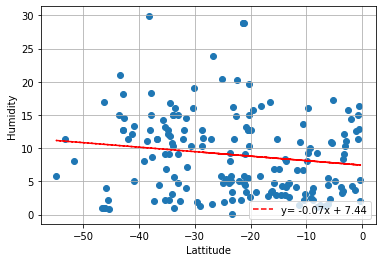

In [73]:
lat=south_hemisphere['Lat']
windspeed=south_hemisphere['Wind_Speed']
ws_slope, ws_int, ws_r, ws_p, ws_std_err = stats.linregress(lat, windspeed)
ws_fit = ws_slope * lat + ws_int
print("r-squared:", ws_r**2)
plt.scatter(lat,windspeed)
plt.plot(lat,ws_fit,"--", color="red",label="y= " +str(round(ws_slope,2)) +"x + "+ str(round(ws_int,2)))
plt.grid(True)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.legend(loc='lower right')
plt.show()

By the above graphs we can say  no  releation ship   between Lattitude and windspeed.
